IMPORTING THE DATA

In [18]:
import pandas as pd
import numpy as np

# Load the EV charging sessions dataset
df = pd.read_csv('ev_charging_sessions.csv')

print("EV Charging Sessions Dataset Loaded Successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 records:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

EV Charging Sessions Dataset Loaded Successfully!

Dataset shape: (3500, 10)
Columns: ['session_id', 'user_id', 'vehicle_id', 'station_id', 'start_time', 'end_time', 'duration_min', 'energy_kWh', 'session_day', 'session_type']

First 5 records:
  session_id user_id vehicle_id station_id           start_time  \
0     CS0001    U339       V347       S091  2024-11-11 12:09:00   
1     CS0002    U286       V463       S025  2024-11-10 19:51:00   
2     CS0003    U092       V419       S007  2024-11-26 18:46:00   
3     CS0004    U369       V070       S008  2024-11-28 19:53:00   
4     CS0005    U185       V298       S037  2024-11-27 13:09:00   

              end_time  duration_min  energy_kWh session_day session_type  
0  2024-11-11 13:26:00            77       26.87     Weekday   Occasional  
1  2024-11-10 21:28:00            97       67.47     Weekend    Emergency  
2  2024-11-26 20:43:00           117       60.16     Weekend      Regular  
3  2024-11-28 21:42:00           109       39.19

CHECKING THE DATASET AND CONVERTING TIME

In [19]:
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')

print(df[['start_time', 'end_time']].dtypes)
print("\nNumber of rows with invalid timestamps:")
print(df[['start_time', 'end_time']].isna().sum())

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

Number of rows with invalid timestamps:
start_time    0
end_time      0
dtype: int64


In [20]:
# Compute duration from timestamps
df['computed_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

# Compare with provided duration_min
df['duration_diff'] = df['computed_duration'] - df['duration_min']

print("Summary of duration differences:")
print(df['duration_diff'].describe())

print("\nRows where difference > 2 minutes:")
df[df['duration_diff'].abs() > 2].head()


Summary of duration differences:
count    3500.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: duration_diff, dtype: float64

Rows where difference > 2 minutes:


,session_id,user_id,vehicle_id,station_id,start_time,end_time,duration_min,energy_kWh,session_day,session_type,computed_duration,duration_diff


Validate `energy_kWh` Values

In [21]:
# Examine energy_kWh distribution
print("Energy (kWh) summary:")
print(df['energy_kWh'].describe())

# Check for invalid values
print("\nNumber of sessions with zero or negative energy:")
print((df['energy_kWh'] <= 0).sum())

# Look at top energy sessions to spot potential outliers
print("\nTop 5 highest energy sessions:")
print(df.sort_values('energy_kWh', ascending=False).head())


Energy (kWh) summary:
count    3500.000000
mean       41.864440
std        20.177468
min         7.890000
25%        26.107500
50%        38.730000
75%        54.800000
max       113.360000
Name: energy_kWh, dtype: float64

Number of sessions with zero or negative energy:
0

Top 5 highest energy sessions:
     session_id user_id vehicle_id station_id          start_time  \
41       CS0042    U210       V386       S031 2024-11-13 06:02:00   
1456     CS1457    U142       V250       S064 2024-11-24 14:47:00   
240      CS0241    U320       V288       S029 2024-11-18 13:54:00   
3249     CS3250    U455       V013       S085 2024-11-02 15:28:00   
3469     CS3470    U124       V342       S057 2024-11-18 17:25:00   

                end_time  duration_min  energy_kWh session_day session_type  \
41   2024-11-13 08:01:00           119      113.36     Weekend      Regular   
1456 2024-11-24 16:47:00           120      107.19     Weekday    Emergency   
240  2024-11-18 15:47:00           113   

In [22]:
#full dataframe

df

,session_id,user_id,vehicle_id,station_id,start_time,end_time,duration_min,energy_kWh,session_day,session_type,computed_duration,duration_diff
0,CS0001,U339,V347,S091,2024-11-11 12:09:00,2024-11-11 13:26:00,77,26.87,Weekday,Occasional,77.0,0.0
1,CS0002,U286,V463,S025,2024-11-10 19:51:00,2024-11-10 21:28:00,97,67.47,Weekend,Emergency,97.0,0.0
2,CS0003,U092,V419,S007,2024-11-26 18:46:00,2024-11-26 20:43:00,117,60.16,Weekend,Regular,117.0,0.0
3,CS0004,U369,V070,S008,2024-11-28 19:53:00,2024-11-28 21:42:00,109,39.19,Weekday,Emergency,109.0,0.0
4,CS0005,U185,V298,S037,2024-11-27 13:09:00,2024-11-27 14:28:00,79,61.71,Weekend,Occasional,79.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,CS3496,U357,V387,S094,2024-11-12 19:19:00,2024-11-12 21:00:00,101,72.29,Weekday,Regular,101.0,0.0
3496,CS3497,U328,V308,S076,2024-11-20 18:50:00,2024-11-20 20:04:00,74,57.34,Weekend,Emergency,74.0,0.0
3497,CS3498,U358,V110,S011,2024-11-05 13:46:00,2024-11-05 15:33:00,107,29.87,Weekend,Regular,107.0,0.0
3498,CS3499,U396,V475,S092,2024-11-25 22:08:00,2024-11-25 23:20:00,72,30.67,Weekday,Emergency,72.0,0.0


Validate and Clean Categorical Columns

In [23]:
# Inspect category distributions
print("Session Day Value Counts:")
print(df['session_day'].value_counts(dropna=False))
print("\nSession Type Value Counts:")
print(df['session_type'].value_counts(dropna=False))

# Check for whitespace or weird patterns
print("\nUnique values in session_day:", df['session_day'].unique())
print("Unique values in session_type:", df['session_type'].unique())

# Check for missing values
print("\nMissing values in session_day:", df['session_day'].isna().sum())
print("Missing values in session_type:", df['session_type'].isna().sum())


Session Day Value Counts:
session_day
Weekday    1760
Weekend    1740
Name: count, dtype: int64

Session Type Value Counts:
session_type
Emergency     1198
Occasional    1152
Regular       1150
Name: count, dtype: int64

Unique values in session_day: ['Weekday' 'Weekend']
Unique values in session_type: ['Occasional' 'Emergency' 'Regular']

Missing values in session_day: 0
Missing values in session_type: 0


Validate Identifier Columns

In [24]:
# Check for missing values in IDs
print("Missing values in ID columns:")
print(df[['session_id', 'user_id', 'vehicle_id', 'station_id']].isna().sum())

# Check for duplicate session IDs
print("\nDuplicate session_id count:")
print(df['session_id'].duplicated().sum())

# Check cardinality
print("\nUnique counts:")
print("Unique sessions:", df['session_id'].nunique())
print("Unique users:", df['user_id'].nunique())
print("Unique vehicles:", df['vehicle_id'].nunique())
print("Unique stations:", df['station_id'].nunique())

# Peek at ID formats
print("\nExample ID formats:")
print(df[['session_id','user_id','vehicle_id','station_id']].head())


Missing values in ID columns:
session_id    0
user_id       0
vehicle_id    0
station_id    0
dtype: int64

Duplicate session_id count:
0

Unique counts:
Unique sessions: 3500
Unique users: 500
Unique vehicles: 499
Unique stations: 100

Example ID formats:
  session_id user_id vehicle_id station_id
0     CS0001    U339       V347       S091
1     CS0002    U286       V463       S025
2     CS0003    U092       V419       S007
3     CS0004    U369       V070       S008
4     CS0005    U185       V298       S037


Checking for Duplicate Rows

In [25]:
# 1. Check for fully duplicated rows
full_duplicates = df.duplicated().sum()
print("Fully duplicated rows:", full_duplicates)

# 2. Check for near-duplicates: same user, station, start_time
near_duplicates = df.duplicated(subset=['user_id', 'station_id', 'start_time']).sum()
print("Near-duplicate user-station-start_time rows:", near_duplicates)

# 3. Check for overlapping sessions at the same station
overlaps = 0
for station in df['station_id'].unique():
    temp = df[df['station_id'] == station].sort_values('start_time')
    temp['next_start'] = temp['start_time'].shift(-1)
    temp['overlap'] = temp['end_time'] > temp['next_start']
    overlaps += temp['overlap'].sum()

print("Number of overlapping sessions at the same station:", overlaps)


Fully duplicated rows: 0
Near-duplicate user-station-start_time rows: 0
Number of overlapping sessions at the same station: 337


THE ABOVE DATASET IS CLEAN

EDA

In [26]:
import pandas as pd

# Load cleaned dataset (if not already in memory)
df = pd.read_csv("ev_charging_sessions.csv", parse_dates=["start_time", "end_time"])

print("Cleaned dataset loaded.")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

print("\nDate range:")
print("Start:", df["start_time"].min())
print("End:  ", df["start_time"].max())


Cleaned dataset loaded.
Shape: (3500, 10)
Columns: ['session_id', 'user_id', 'vehicle_id', 'station_id', 'start_time', 'end_time', 'duration_min', 'energy_kWh', 'session_day', 'session_type']

Date range:
Start: 2024-11-01 06:03:00
End:   2024-11-28 22:32:00


Station-Level Usage

Number of unique stations: 100

Top 10 busiest stations:
station_id
S014    50
S047    48
S015    46
S019    45
S085    45
S049    45
S012    44
S068    44
S029    44
S031    44
Name: count, dtype: int64


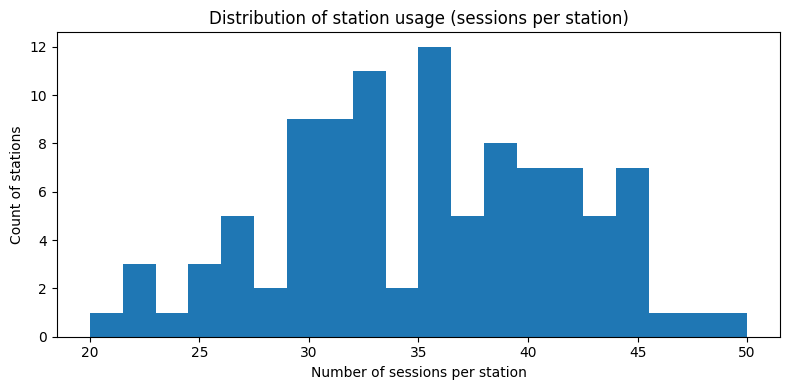

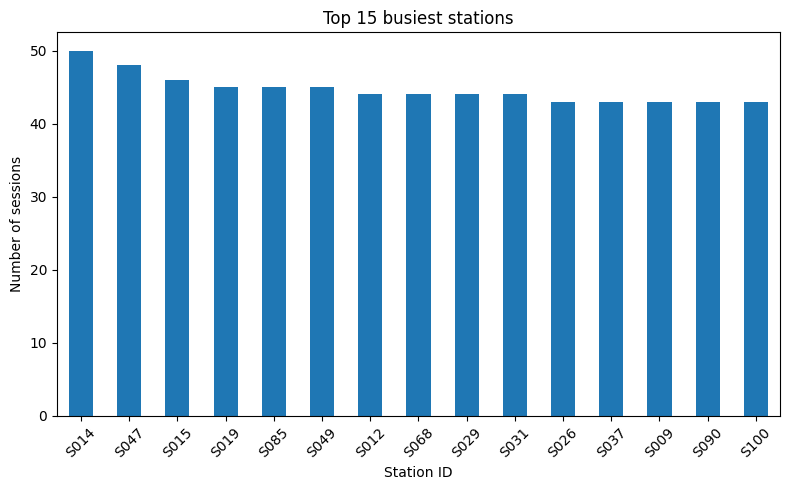

In [27]:
import matplotlib.pyplot as plt

# Sessions per station
station_counts = df["station_id"].value_counts()

print("Number of unique stations:", station_counts.shape[0])
print("\nTop 10 busiest stations:")
print(station_counts.head(10))

# Plot distribution of sessions per station
plt.figure(figsize=(8,4))
station_counts.plot(kind="hist", bins=20)
plt.xlabel("Number of sessions per station")
plt.ylabel("Count of stations")
plt.title("Distribution of station usage (sessions per station)")
plt.tight_layout()
plt.show()

# Bar plot of top 15 stations
top_n = 15
plt.figure(figsize=(8,5))
station_counts.head(top_n).plot(kind="bar")
plt.xlabel("Station ID")
plt.ylabel("Number of sessions")
plt.title(f"Top {top_n} busiest stations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Temporal Patterns: Day of Week

session_day
Weekday    1760
Weekend    1740
Name: count, dtype: int64


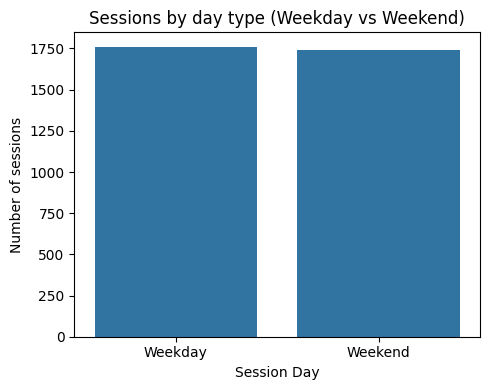

In [28]:
import seaborn as sns

# Sessions by session_day
day_counts = df["session_day"].value_counts()

print(day_counts)

plt.figure(figsize=(5,4))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.xlabel("Session Day")
plt.ylabel("Number of sessions")
plt.title("Sessions by day type (Weekday vs Weekend)")
plt.tight_layout()
plt.show()


Temporal Patterns: Hour of Day

hour
6     209
7     199
8     199
9     173
10    180
11    187
12    200
13    216
14    223
15    231
16    236
17    178
18    208
19    215
20    203
21    239
22    204
Name: count, dtype: int64


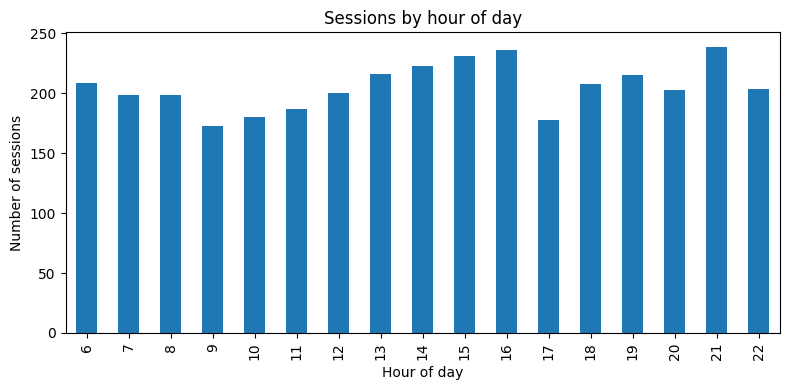

In [29]:
# Extract hour of day if not already present
if "hour" not in df.columns:
    df["hour"] = df["start_time"].dt.hour

hour_counts = df["hour"].value_counts().sort_index()

print(hour_counts)

plt.figure(figsize=(8,4))
hour_counts.plot(kind="bar")
plt.xlabel("Hour of day")
plt.ylabel("Number of sessions")
plt.title("Sessions by hour of day")
plt.tight_layout()
plt.show()


Hour-of-Day × Day-of-Week Heatmap

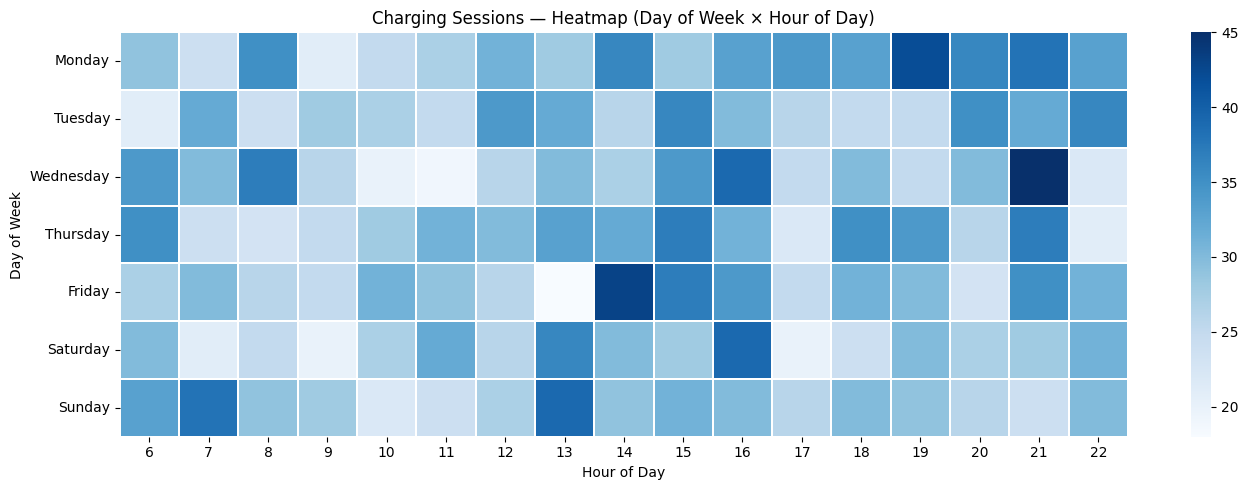

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure "hour" and "day_of_week" exist
df["hour"] = df["start_time"].dt.hour
df["day_of_week"] = df["start_time"].dt.day_name()

# Order days properly
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Create pivot table
heatmap_data = df.pivot_table(
    index="day_of_week",
    columns="hour",
    values="session_id",
    aggfunc="count",
    fill_value=0
).reindex(days_order)

# Plot heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(heatmap_data, cmap="Blues", linewidths=0.3)
plt.title("Charging Sessions — Heatmap (Day of Week × Hour of Day)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


Station-Level Temporal Analysis

In [31]:
# Count sessions per station
station_counts = df["station_id"].value_counts()

top5_stations = station_counts.head(5).index.tolist()
print("Top 5 busiest stations:", top5_stations)


Top 5 busiest stations: ['S014', 'S047', 'S015', 'S019', 'S085']


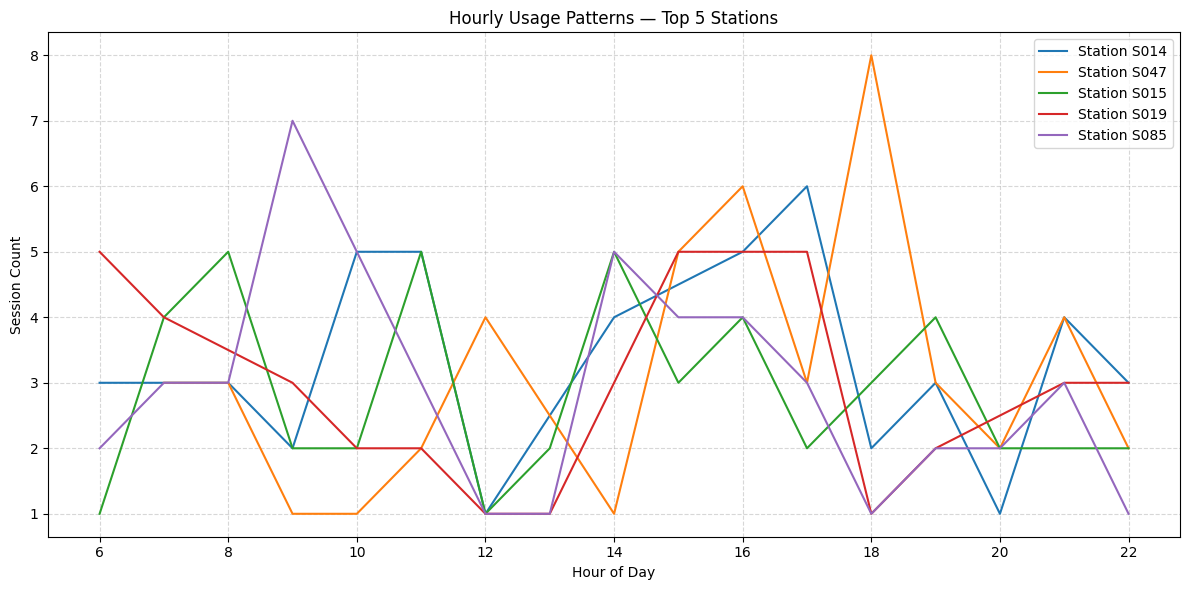

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for station in top5_stations:
    subset = df[df['station_id'] == station]
    hourly_counts = subset['hour'].value_counts().sort_index()
    plt.plot(hourly_counts.index, hourly_counts.values, label=f"Station {station}")

plt.xlabel("Hour of Day")
plt.ylabel("Session Count")
plt.title("Hourly Usage Patterns — Top 5 Stations")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


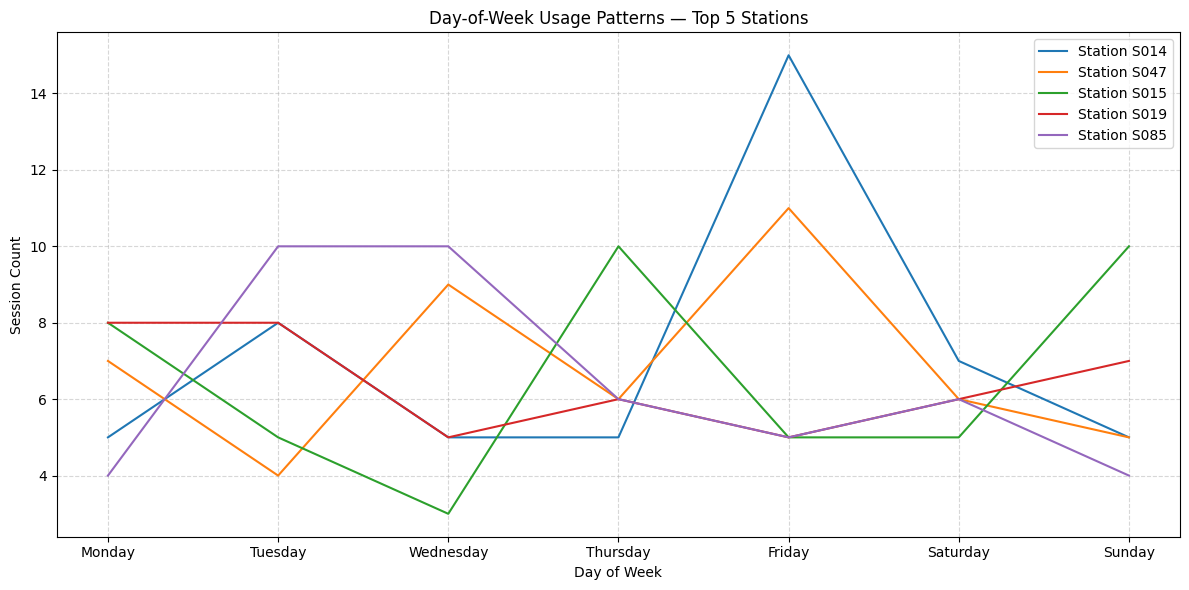

In [33]:
import seaborn as sns

plt.figure(figsize=(12, 6))

for station in top5_stations:
    subset = df[df['station_id'] == station]
    day_counts = subset['day_of_week'].value_counts().reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
        fill_value=0
    )
    plt.plot(day_counts.index, day_counts.values, label=f"Station {station}")

plt.xlabel("Day of Week")
plt.ylabel("Session Count")
plt.title("Day-of-Week Usage Patterns — Top 5 Stations")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


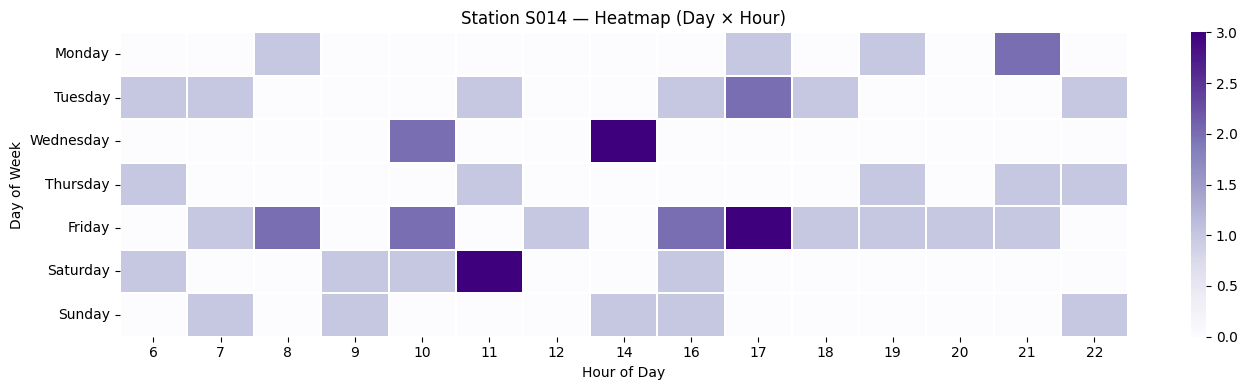

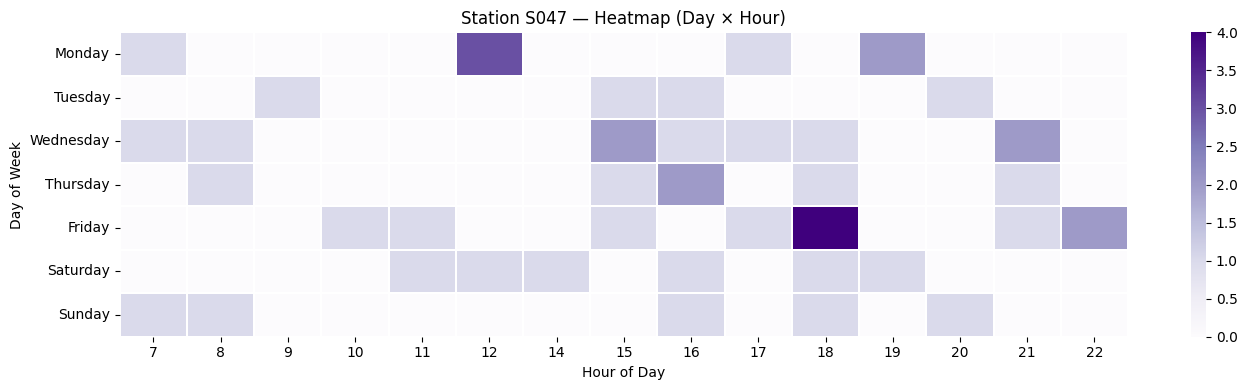

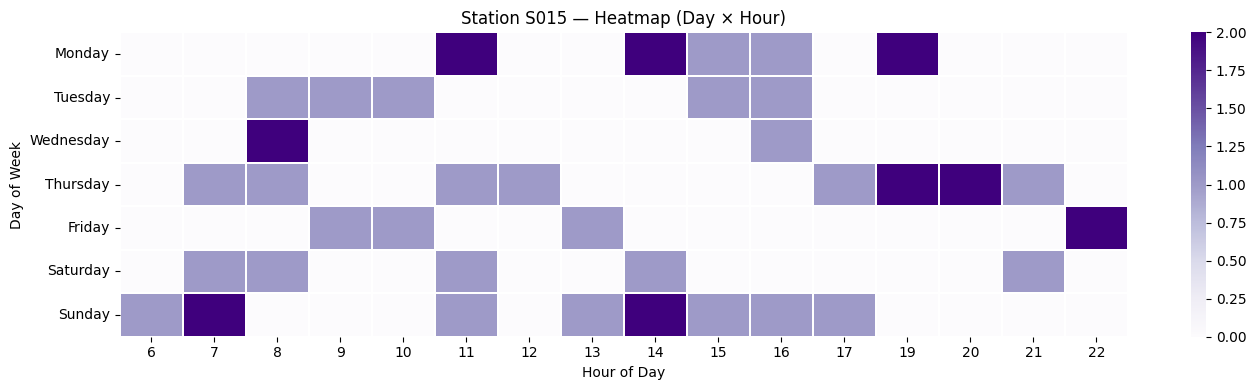

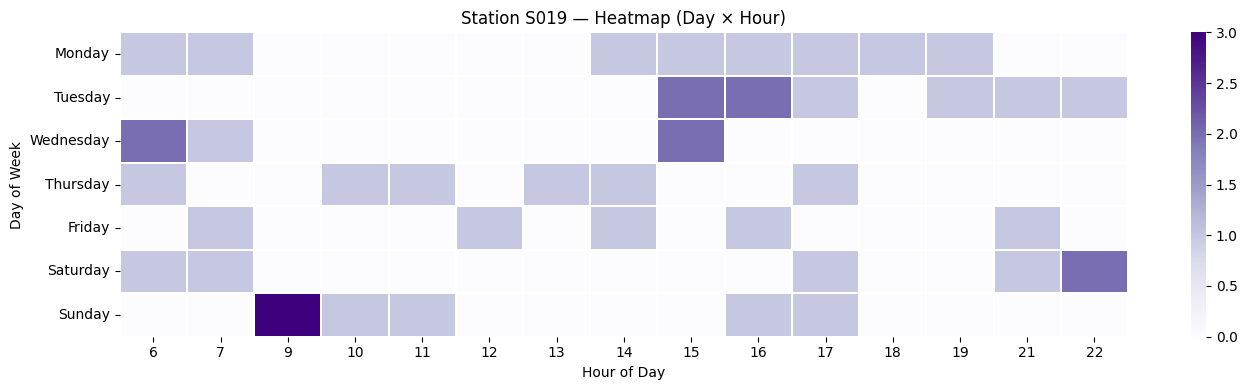

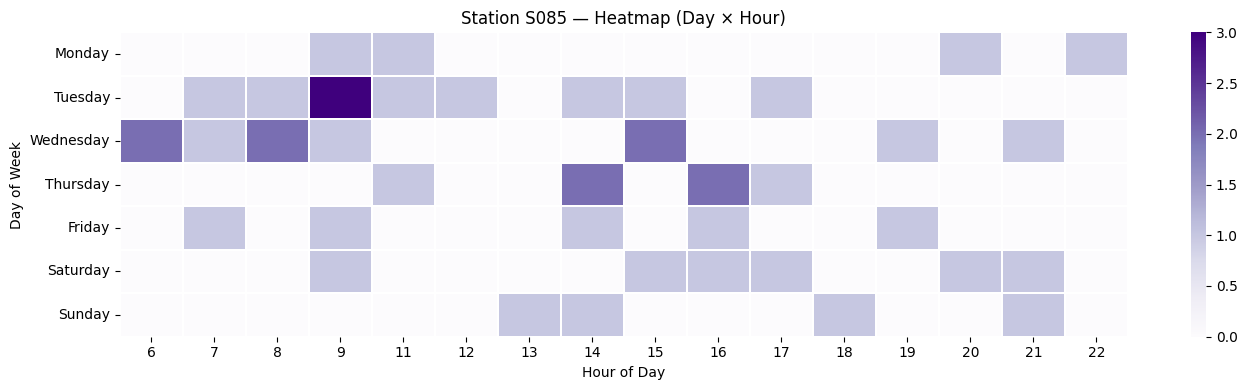

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

for station in top5_stations:
    station_df = df[df['station_id'] == station]
    
    heatmap_data = station_df.pivot_table(
        index="day_of_week",
        columns="hour",
        values="session_id",
        aggfunc="count",
        fill_value=0
    ).reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

    plt.figure(figsize=(14, 4))
    sns.heatmap(heatmap_data, cmap="Purples", linewidths=0.3)
    plt.title(f"Station {station} — Heatmap (Day × Hour)")
    plt.xlabel("Hour of Day")
    plt.ylabel("Day of Week")
    plt.tight_layout()
    plt.show()
